In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import shapely.geometry as sg
import descartes
import matplotlib.animation as anim

In [10]:
# Dimensions of simulation
lx = 400
ly = 400

In [11]:
# Draw lens
c1 = (200, 140)
c2 = (200, 220)
r = 75.0

pc1 = sg.Point(c1[1],c1[0]).buffer(r)
pc2 = sg.Point(c2[1],c2[0]).buffer(r)

lens = pc1.intersection(pc2)

In [12]:
# Material
cdtds = 1.0 / np.sqrt(2)
imp = 377.0

Chxh = 1.0
Chyh = 1.0
Chxe = np.zeros((lx, ly))
Chye = np.zeros((lx, ly))
Cezh = np.zeros((lx, ly))
Ceze = np.ones((lx, ly))

Chxe[:] = cdtds / imp
Chye[:] = cdtds / imp
Cezh[:] = cdtds * imp

# Change material property in lens
n = 0.4
for i in range(lx):
  for j in range(ly):
    d1 = np.sqrt((i-c1[0])**2 + (j-c1[1])**2)
    d2 = np.sqrt((i-c2[0])**2 + (j-c2[1])**2)
    if d1 < r and d2 < r:
      Chxe[i, j] = n*cdtds / imp
      Chye[i, j] = n*cdtds / imp

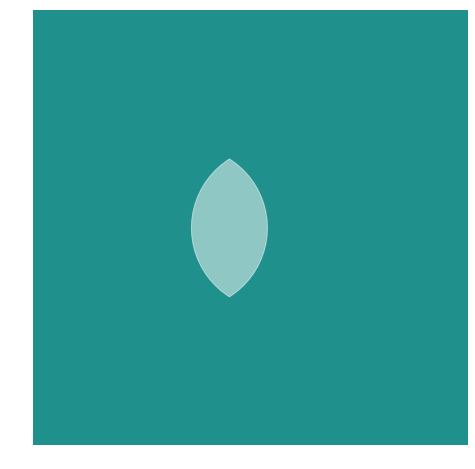

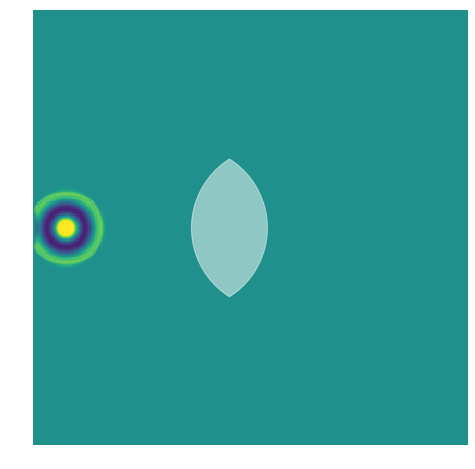

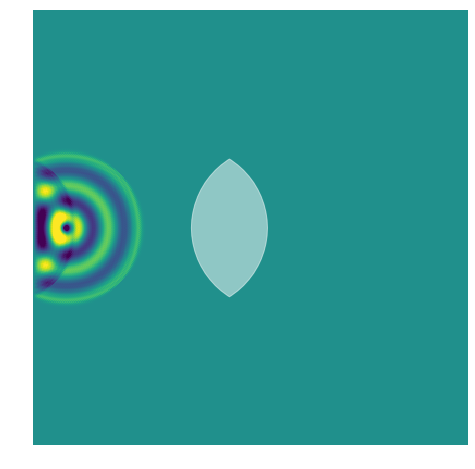

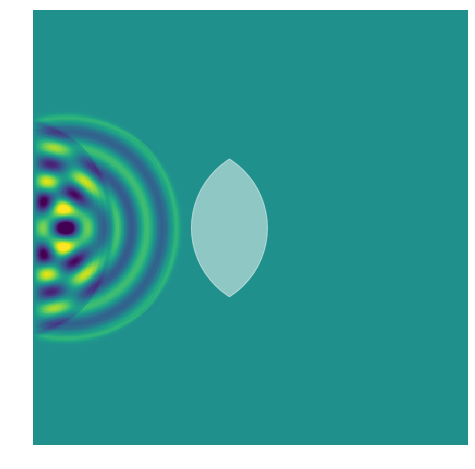

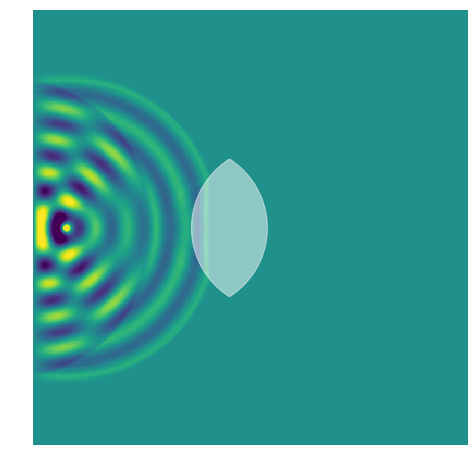

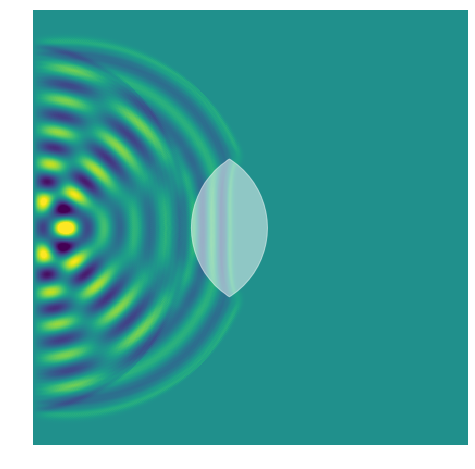

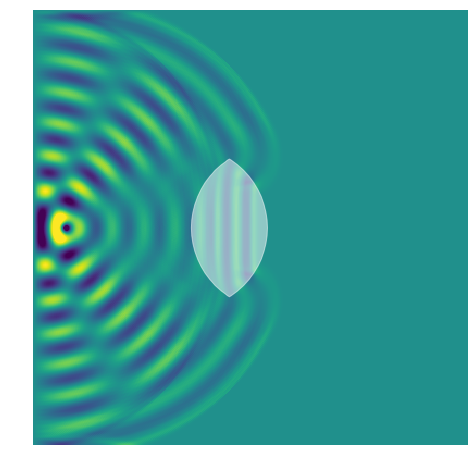

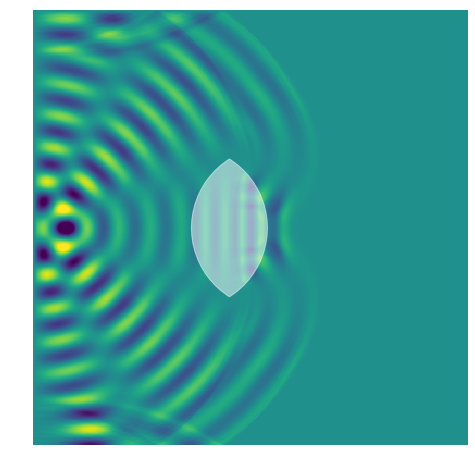

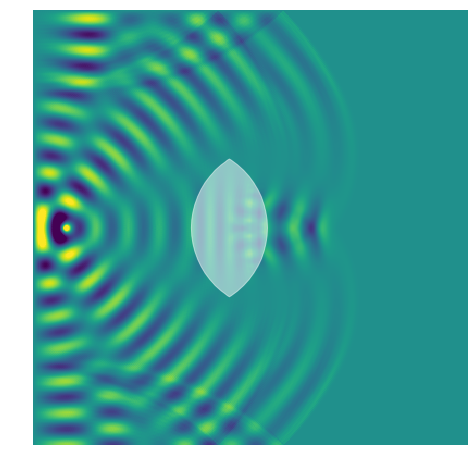

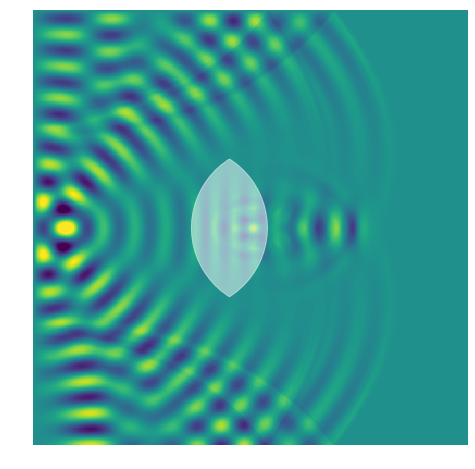

In [9]:
Hx = np.zeros((lx, ly))
Hy = np.zeros((lx, ly))
Ez = np.zeros((lx, ly))

for t in range(500):
  # Maxwell's equations in finite difference form
  Hx[-1, -1] = Hx[-2, -2]
  Hx[:-1, :-1] = Chxh*Hx[:-1, :-1] - Chxe[:-1, :-1]*(Ez[:-1, 1:] - Ez[:-1, :-1])
  Hy[:-1, :-1] = Chyh*Hy[:-1, :-1] + Chye[:-1, :-1]*(Ez[1:, :-1] - Ez[:-1, :-1])
  Ez[0, 0] = Ez[1, 1]
  Ez[1:, 1:] = Ceze[1:, 1:]*Ez[1:, 1:] + Cezh[1:, 1:]*((Hy[1:, 1:] - Hy[:-1, 1:]) - (Hx[1:, 1:] - Hx[1:, :-1]))
        
  # Source
  if t < 500:
    Ez[200, 30] += 25*np.sin(0.05*np.pi*t)
  
  # Plot every 50 steps
  if t % 50 == 0:
    plt.figure(figsize=(8, 8))
    plt.gca().add_patch(descartes.PolygonPatch(lens, fc='w', ec='w', alpha=.5))
    plt.axis('off')
    plt.imshow(Ez, vmin=-1, vmax=1)
    plt.show()